In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('/Users/amberdaniyal/Desktop/DA final project/us-shein-beauty_and_health-4267.csv')

df.head(5)
df.info()
df.shape
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4266 entries, 0 to 4265
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   goods-title-link--jump       39 non-null     object 
 1   goods-title-link--jump href  39 non-null     object 
 2   selling_proposition          3257 non-null   object 
 3   price                        4266 non-null   object 
 4   discount                     3984 non-null   object 
 5   color-count                  1206 non-null   float64
 6   rank-title                   838 non-null    object 
 7   rank-sub                     838 non-null    object 
 8   goods-title-link             4227 non-null   object 
dtypes: float64(1), object(8)
memory usage: 300.1+ KB


goods-title-link--jump         4227
goods-title-link--jump href    4227
selling_proposition            1009
price                             0
discount                        282
color-count                    3060
rank-title                     3428
rank-sub                       3428
goods-title-link                 39
dtype: int64

In [559]:
#drop columns
df = df.drop(columns=['goods-title-link--jump' , 'goods-title-link--jump href', 'rank-title' , 'rank-sub' ])
print(df.columns)

Index(['selling_proposition', 'price', 'discount', 'color-count',
       'goods-title-link'],
      dtype='object')


In [560]:
#fill missing values in color count and selling proposition
df['color-count'] = df['color-count'].fillna('0')
df['selling_proposition'] = df['selling_proposition'].fillna('Not available')
print(df['color-count'])
print(df['selling_proposition'])

0          0
1       14.0
2          0
3          0
4        8.0
        ... 
4261       0
4262       0
4263       0
4264    10.0
4265       0
Name: color-count, Length: 4266, dtype: object
0         30+ sold recently
1             Not available
2             Not available
3       5.3k+ sold recently
4             Not available
               ...         
4261     400+ sold recently
4262    2.9k+ sold recently
4263          Not available
4264          Not available
4265      30+ sold recently
Name: selling_proposition, Length: 4266, dtype: object


In [561]:
#check for null values
print(df.isnull().sum())

selling_proposition      0
price                    0
discount               282
color-count              0
goods-title-link        39
dtype: int64


In [562]:
#Fill missing values in discount column
df['discount'] = df['discount'].replace([None], '0%') #used chatGPT because even after replacing the value , '' , I still had some missing values showing.

#Convert discount column to numeric values
df['discount_percent'] = df['discount'].str.replace('%', '').astype(float)

#check to confirm
print(df[['discount', 'discount_percent']].isna().sum())

discount            0
discount_percent    0
dtype: int64


In [563]:
#replace missing product names with 'Unknown Product'
df['goods-title-link'] = df['goods-title-link'].replace([None], 'Unknown Product')
print(df[['goods-title-link']].isna().sum())

goods-title-link    0
dtype: int64


In [564]:
print(df['price'].apply(type).value_counts())
# Replace $ and non-numeric characters, then convert to float (using chatGPT)
df['price'] = df['price'].astype(str).str.replace('[,$]', '', regex=True).str.replace('$', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

price
<class 'str'>    4266
Name: count, dtype: int64


In [565]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
selling_proposition,4266,109,Not available,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,4266.0,NaN,NaN,NaN,5.338912,11.075828,0.15,1.5625,2.39,4.5,209.3
discount,4266,83,-4%,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color-count,4266,27,0,3060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goods-title-link,4266,4098,Unknown Product,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_percent,4266.0,NaN,NaN,NaN,-16.225035,17.308266,-89.0,-25.0,-8.0,-5.0,0.0


In [566]:
print(df.isnull().sum())

selling_proposition    0
price                  0
discount               0
color-count            0
goods-title-link       0
discount_percent       0
dtype: int64


In [567]:
## used chatGPT to extract Estimated Sales from selling_proposition column
def extract_sales(text):
    if text == "Not available":
        return 0
    match = re.search(r'(\d+\.?\d*)([kK])?', text)
    if match:
        num = float(match.group(1))
        suffix = match.group(2)
        if suffix:
            return int(num * 1000)
        else:
            return int(num)
    return 0

df['estimated_sales'] = df['selling_proposition'].apply(extract_sales)

In [568]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4266 entries, 0 to 4265
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   selling_proposition  4266 non-null   object 
 1   price                4266 non-null   float64
 2   discount             4266 non-null   object 
 3   color-count          4266 non-null   object 
 4   goods-title-link     4266 non-null   object 
 5   discount_percent     4266 non-null   float64
 6   estimated_sales      4266 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 233.4+ KB
None
   selling_proposition  price discount color-count goods-title-link  \
0    30+ sold recently   5.90      -5%           0  Unknown Product   
1        Not available   4.99     -17%        14.0  Unknown Product   
2        Not available   2.64     -20%           0  Unknown Product   
3  5.3k+ sold recently   1.50     -12%           0  Unknown Product   
4        Not availab

In [569]:
df = df.rename(columns={'goods-title-link': 'product_name'})
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4266 entries, 0 to 4265
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   selling_proposition  4266 non-null   object 
 1   price                4266 non-null   float64
 2   discount             4266 non-null   object 
 3   color-count          4266 non-null   object 
 4   product_name         4266 non-null   object 
 5   discount_percent     4266 non-null   float64
 6   estimated_sales      4266 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 233.4+ KB
None
   selling_proposition  price discount color-count     product_name  \
0    30+ sold recently   5.90      -5%           0  Unknown Product   
1        Not available   4.99     -17%        14.0  Unknown Product   
2        Not available   2.64     -20%           0  Unknown Product   
3  5.3k+ sold recently   1.50     -12%           0  Unknown Product   
4        Not availab

In [570]:
top_products = df.sort_values('estimated_sales', ascending=False).head(10)
print(top_products[['product_name', 'estimated_sales', 'price', 'discount']])


                                           product_name  estimated_sales  \
2808  100pcs Long Clear Coffin Fake Nail Tips Extra ...            10000   
666   1pc 3 In 1 Makeup Tool For Eyeshadow, Magic Us...            10000   
638   Makeup Eyeshadow Palette, 9-Color Eye Shadow G...            10000   
624   1 Pc Compact Portable Mini Daisy Candy Air Cus...            10000   
611   8pcs Girls Hairdressing Bangs Traceless Hair C...            10000   
3418  10 Pairs False Eyelashes 6D Super Fluffy Wispy...            10000   
601                     Pink Eyebrow Scissors With Comb            10000   
1715  1pc Nail Art U-Shaped Stainless Steel Clipper,...            10000   
2396  Resin Nail Art Palette, Faux Agate Display Boa...            10000   
584   Portable Eyelash Curler With Silicone Pad, 1pc...            10000   

      price discount  
2808   2.09     -16%  
666    1.30      -7%  
638    2.20      -4%  
624    1.60     -20%  
611    1.50     -12%  
3418   3.10      -3%  
60

In [571]:
print("Average Discount: ", df['discount_percent'].mean())

Average Discount:  -16.22503516174402


In [572]:
print(df['color-count'].value_counts())

color-count
0       3060
4.0      322
5.0      172
6.0      132
7.0      114
10.0      72
8.0       65
9.0       57
12.0      45
14.0      37
13.0      33
11.0      30
20.0      26
15.0      17
16.0      16
21.0      11
36.0      10
17.0       8
30.0       7
19.0       6
22.0       5
28.0       5
26.0       5
27.0       4
18.0       4
25.0       2
24.0       1
Name: count, dtype: int64


In [573]:
print(df['discount'].value_counts().head(10))
# Invert the sign of discount_percent
df['discount_percent'] = -df['discount_percent']

discount
-4%     463
-6%     373
-5%     342
-7%     329
-8%     294
0%      282
-3%     209
-50%    190
-20%    135
-26%    127
Name: count, dtype: int64


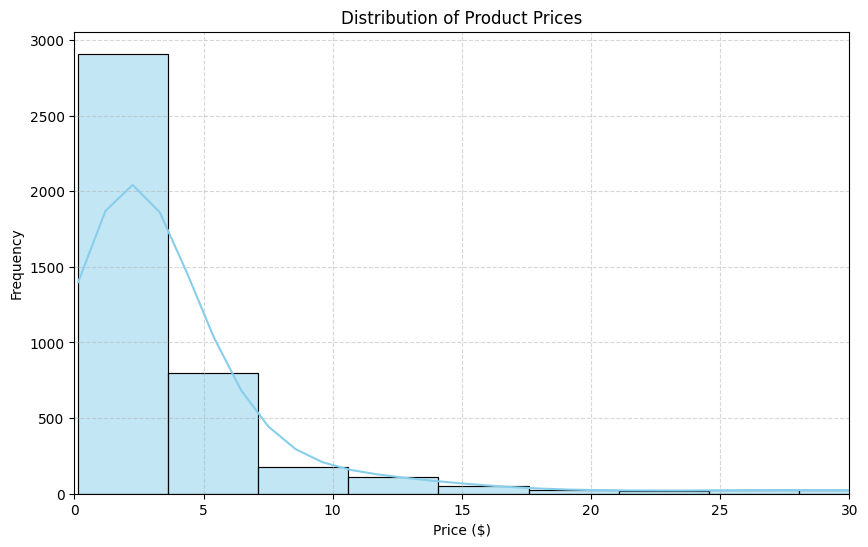

In [574]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=60, kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 30)
plt.show()

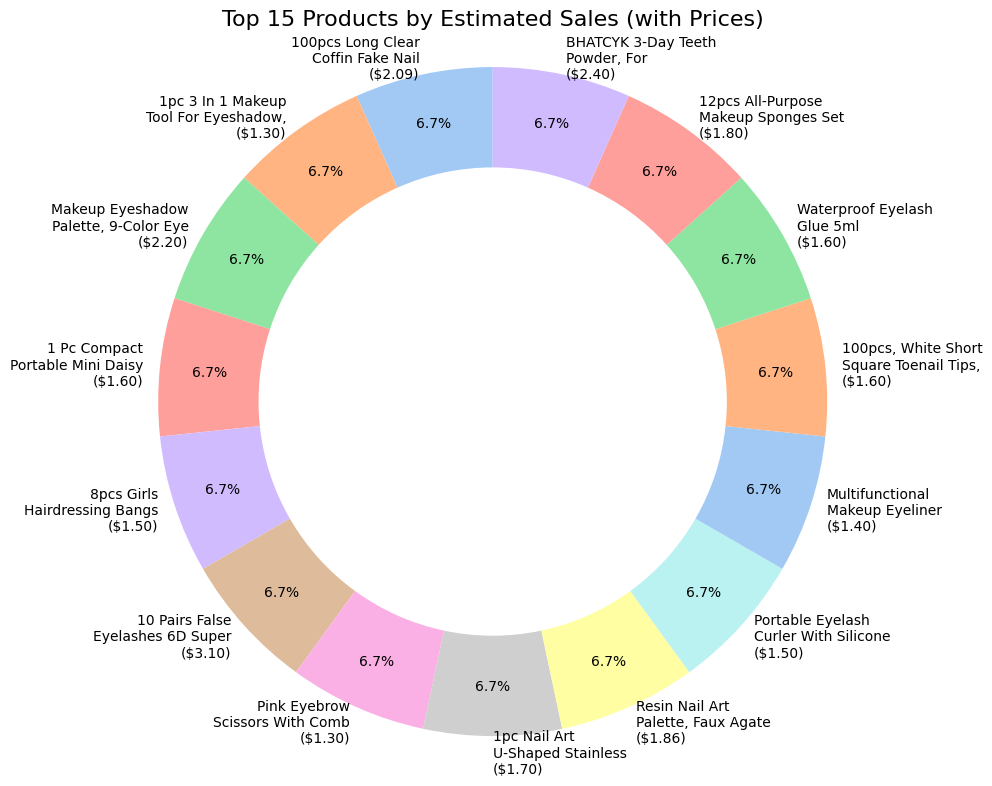

In [575]:
top_15 = df.sort_values(by='estimated_sales', ascending=False).head(15)

# Prepare labels with name and price
labels = top_15['product_name'].str.wrap(20).apply(lambda x: '\n'.join(x.split('\n')[:2]))
sizes = top_15['estimated_sales']
prices = top_15['price']

# Plot
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')[:len(labels)]

# Combine labels with prices
label_w_prices = [f"{lbl}\n(${price:.2f})" for lbl, price in zip(labels, prices)]

# Pie chart
plt.pie(sizes, labels=label_w_prices, autopct='%1.1f%%', startangle=90,
        colors=colors, pctdistance=0.85, labeldistance=1.05,
        wedgeprops=dict(width=0.3))

# Draw center circle
centre_circle = plt.Circle((0, 0), 0.25, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 15 Products by Estimated Sales (with Prices)', fontsize=16)
plt.axis('equal')
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()


Products under $3 represent 68% of top sellers and generate 59% of estimated sales

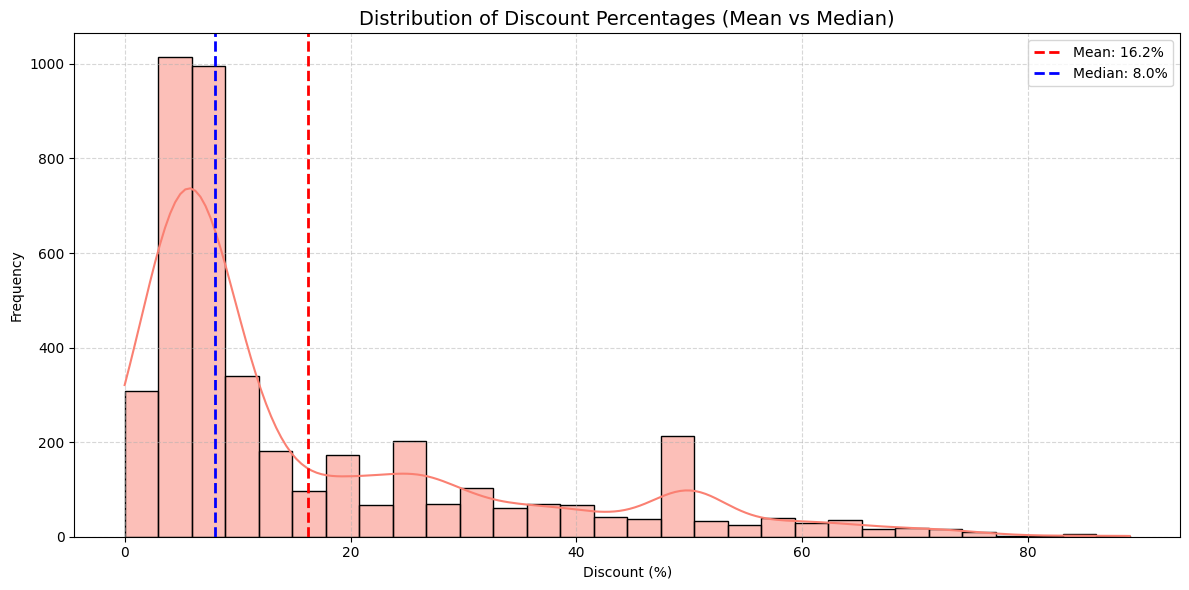

In [576]:
# Plot histogram + KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['discount_percent'], bins=30, kde=True, color='salmon')

# Calculate mean and median
mean_discount = df['discount_percent'].mean()
median_discount = df['discount_percent'].median()

# Add mean line #used chatGPT
plt.axvline(mean_discount, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_discount:.1f}%')

# Add median line #used chatGPT
plt.axvline(median_discount, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_discount:.1f}%')
# Add legend and labels
plt.title('Distribution of Discount Percentages (Mean vs Median)', fontsize=14)
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

Distribution of Discount Percentages

This histogram shows the frequency of different discount percentages applied to products. The x-axis represents the discount percentage. The y-axis shows how many products fall into each discount bin. 

Most Common Discounts : The majority of products have small discounts (around 5% to 10%).
No Discount : A significant number of products are sold without any discount (0%).
Deep Discounts : Few products offer deep discounts (> 50%), but they are rare.
Average Discount : The mean discount across all products is approximately 16.2%.

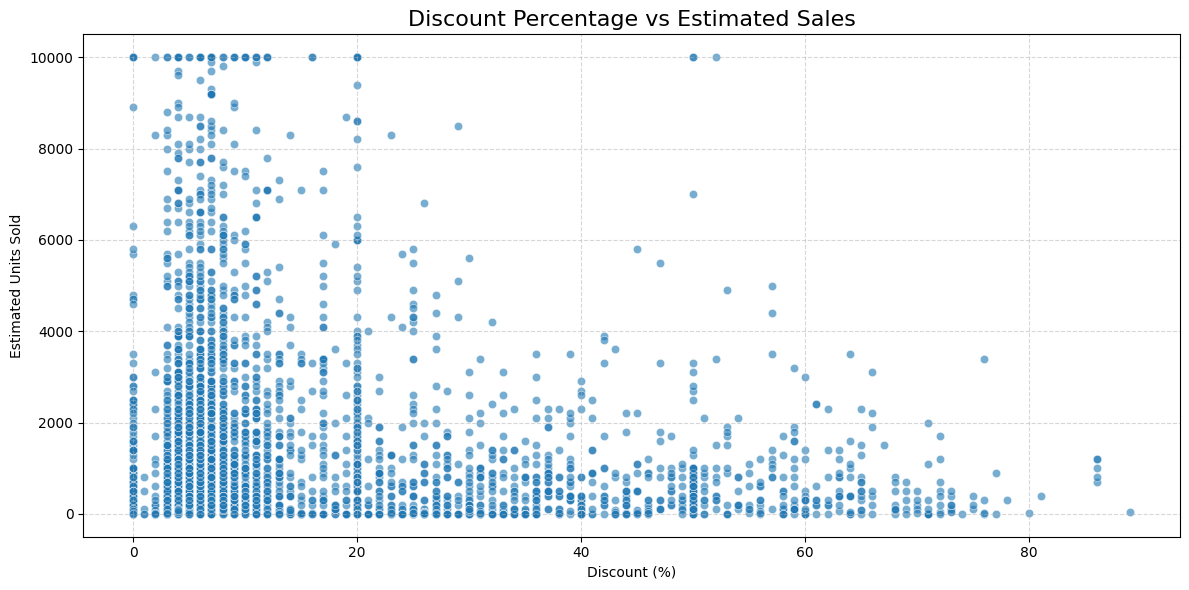

In [557]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_percent', y='estimated_sales', data=df, alpha=0.6)
plt.title('Discount Percentage vs Estimated Sales', fontsize=16)
plt.xlabel('Discount (%)')
plt.ylabel('Estimated Units Sold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

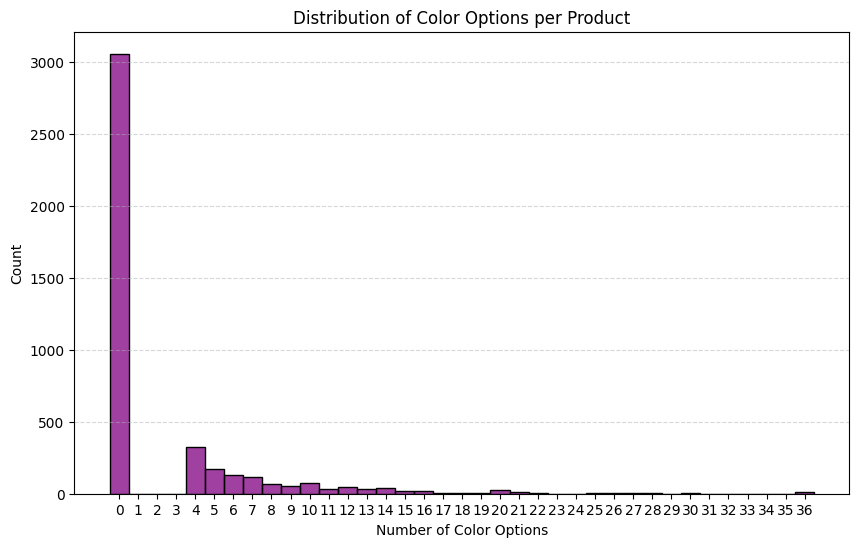

In [577]:
df['color-count'] = pd.to_numeric(df['color-count'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(df['color-count'], bins=range(0, int(df['color-count'].max()) + 1), color='purple', discrete=True)
plt.title('Distribution of Color Options per Product')
plt.xlabel('Number of Color Options')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(range(0, int(df['color-count'].max()) + 1))
plt.show()

	
More color choices attract attention, but not always tied to sales